In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import nltk
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

IMPORTING DATASET

In [ ]:
df_path = "/content/Restaurant_Reviews.csv"
df = pd.read_csv(df_path)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.iloc[0:15]

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
review = df['Review'][0]
review

'Wow... Loved this place.'

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string

In [ ]:
def clean_data(data):
    sw= stopwords.words('english')
    sw.remove('not')
    sw.remove("don't")
    sw.remove("shouldn't")
    sw.remove("wouldn't")
   
    ps = PorterStemmer()
    
    re.sub(r"http\S+|www.*", "", data)# it will remove url links
    data = word_tokenize(data.lower())#lowercase and then tokenize all the words
    data = [word for word in set(data) if word.isalpha() and word not in string.punctuation and word!='\n' and len(word) > 2 and word not in sw]
    return " ".join(data)

df['Review_clean']=df['Review'].apply(clean_data)
df['Review_clean'].head()

0                                      wow loved place
1                                       crust good not
2                              tasty texture not nasty
3    recommendation steve rick loved stopped may ho...
4                          prices menu great selection
Name: Review_clean, dtype: object

In [ ]:
df['review_length']= df['Review'].apply(len)

In [ ]:
df.head(10)

,Review,Liked,Review_clean,review_length
0,Wow... Loved this place.,1,wow loved place,24
1,Crust is not good.,0,crust good not,18
2,Not tasty and the texture was just nasty.,0,tasty texture not nasty,41
3,Stopped by during the late May bank holiday of...,1,recommendation steve rick loved stopped may ho...,87
4,The selection on the menu was great and so wer...,1,prices menu great selection,59
5,Now I am getting angry and I want my damn pho.,0,pho want angry getting damn,46
6,Honeslty it didn't taste THAT fresh.),0,honeslty fresh taste,37
7,The potatoes were like rubber and you could te...,0,could like warmer time tell rubber made kept p...,111
8,The fries were great too.,1,great fries,25
9,A great touch.,1,great touch,14


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


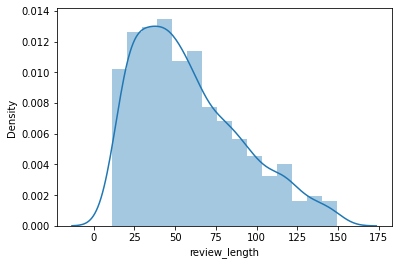

In [ ]:
sns.distplot(df['review_length'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


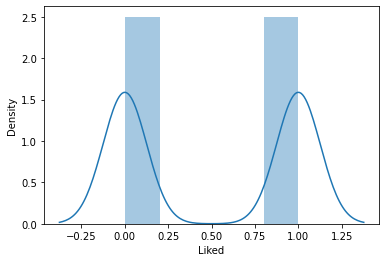

In [ ]:
sns.distplot(df['Liked'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f18a6717e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f18a671df10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f18a6724f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f18a6724a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f18a671d490>,
  <matplotlib.lines.Line2D at 0x7f18a671d9d0>]}

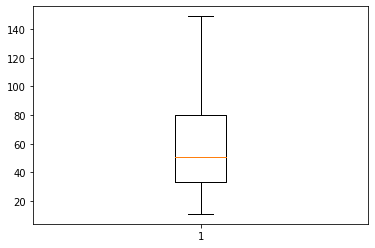

In [ ]:
plt.boxplot(df['review_length'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f18a668c0d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f18a6694110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f18a669e150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f18a6694bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f18a668c650>,
  <matplotlib.lines.Line2D at 0x7f18a668cb90>]}

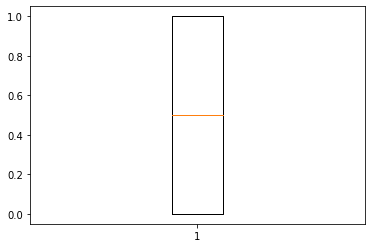

In [ ]:
plt.boxplot(df['Liked'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df

,Review,Liked,Review_clean,review_length
0,Wow... Loved this place.,1,wow loved place,24
1,Crust is not good.,0,crust good not,18
2,Not tasty and the texture was just nasty.,0,tasty texture not nasty,41
3,Stopped by during the late May bank holiday of...,1,recommendation steve rick loved stopped may ho...,87
4,The selection on the menu was great and so wer...,1,prices menu great selection,59
...,...,...,...,...
995,I think food should have flavor and texture an...,0,lacking flavor food texture think,66
996,Appetite instantly gone.,0,instantly appetite gone,24
997,Overall I was not impressed and would not go b...,0,overall impressed back would not,50
998,"The whole experience was underwhelming, and I ...",0,ninja whole experience sushi time next underwh...,91


**PIPELINE METHOD**

In [ ]:
X= df['Review_clean']
y= df['Liked']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=4)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
myModel = Pipeline([
                    ("vectorizer",CountVectorizer(max_features= 2000)),
                    ("svc",SVC())
])

In [ ]:
myModel.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=2000)),
                ('svc', SVC())])

In [ ]:
myModel.score(X_test,y_test)

0.7933333333333333

SEPERATE **METHOD** 

In [ ]:
cv = CountVectorizer(max_features= 2000)
X= cv.fit_transform(df['Review_clean']).toarray()
y= df['Liked']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=4)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(700, 1849) (700,) (300, 1849) (300,)


In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
x=df['Review']

In [ ]:
x

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [ ]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [ ]:
model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
y_test

869    0
907    1
112    1
462    1
59     0
      ..
117    0
918    0
655    0
589    0
336    0
Name: Liked, Length: 300, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.79

THE SVC MODEL GAVE AN ACCURACY OF 79%.

THE PIPELINE MODEL GAVE ACCURACY OF 79.33%

**JOBLIB**

In [ ]:
import joblib
filename = '/content/Restaurant_Reviews_model.sav'
joblib.dump(myModel, filename)

['/content/Restaurant_Reviews_model.sav']

In [ ]:
# A seperate Model of .svc file is created

In [ ]:
loaded_model = joblib.load(filename)
newReview = np.array(["the food is really bad.Didn't like it"])
series = pd.Series(newReview)
newTransformedReview = cv.fit_transform(series).toarray()
myPred = loaded_model.predict(series)
print(myPred)

[0]


In [ ]:
#[0] denotes negative review

In [ ]:
loaded_model = joblib.load(filename)
newReview = np.array(["the food is really good"])
series = pd.Series(newReview)
newTransformedReview = cv.fit_transform(series).toarray()
myPred = loaded_model.predict(series)
print(myPred)

[1]


In [ ]:
#[1] denotes positive review